In [25]:
import numpy as np
import pandas as pd

In [26]:
df=pd.read_csv("desktop/py_files/data/titanic_train.csv")

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
#removing the null values from our dataset
median_Age=df.Age.median()
df.Age.fillna(median_Age,inplace=True)

In [29]:
df.info()#checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
#dropping the non-req columns
df.drop(["Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.Sex.drop_duplicates())
df.Sex=le.transform(df.Sex)
#converting sex column from object to int

<AxesSubplot:>

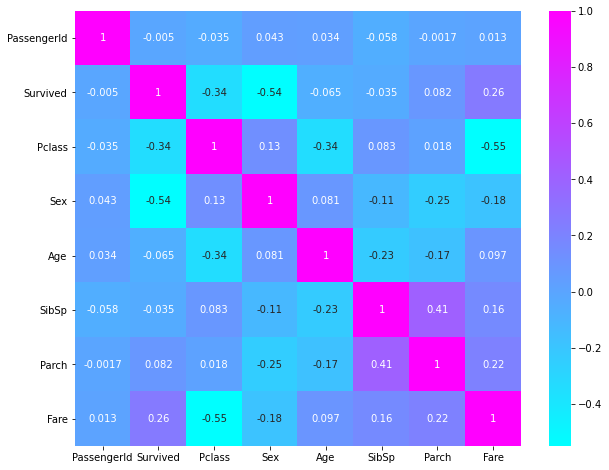

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,cmap="cool")
#checking  how the parameters affecting each other

### Using Logistic Regression to predict total passengers "Survived"

In [52]:
y=df.Survived #Target_variable
x=df.drop("Survived",axis=1) #Independent_variable
#separating our target variable and dependent variable for training and testing

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

#### Without Hyperparameter tuning

In [54]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [55]:
reg.fit(X_train,y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
reg.score(X_train,y_train) #model score on training data

0.7935393258426966

In [56]:
reg.score(X_test,y_test)#model score on testing data

0.7821229050279329

In [57]:
#without doing any tuning we are getting a reasonable score in our model.
#let us see how we can improve our model score

#### Applying Tunning Techniques
  --> GridSearchCv()

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
reg1 = GridSearchCV(reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
reg2=reg1.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 1304 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 3641 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4793 out of 4800 | elapsed:  2.1min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  2.1min finished


In [62]:
reg2.score(X_train,y_train) #model score on training data

0.8019662921348315

In [61]:
reg2.score(X_test,y_test)#model score on testing data

0.7877094972067039

--->Ploting a confusion matrix for our model

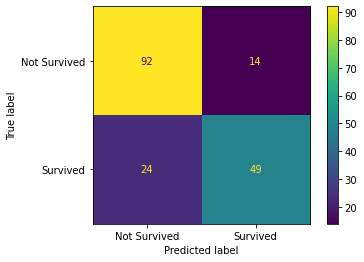

In [69]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(reg2,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Not Survived","Survived"])